# Dynamic systems

These models try to solve using a time trayectory of a physic state as a function from some dynamic generator such as operators or other types of functions, these are often represented in a functional way.

In some cases (like the one we're about to study) these dynamics for a state $x$ can be modelated like a dynamic equation.
\begin{equation}
\frac{dx}{dt} = f(t, x),
\end{equation}
With its initial condition:
\begin{equation}
x(t_0) = x_0.
\end{equation}

In this case '$x$' is a **state of the system** that can be represented by an **linear operator**.

In mathematics these problems are often called '**Initial value problems**'

## Solutions for dynamic systems

The dynamic systems and analitical solutions for Differential Equations are important to understand for a physicist so let's understand the ground with a Runge-Kutta problem.

See more information about [Runge-Kutta](https://en.wikipedia.org/wiki/Runge%E2%80%93Kutta_methods).

For the example we'll be using the range 4 of 'RK'. 

## Runge-Kutta Method of order 4 (RK4)

This is defined by the next expression


* $k_{1}= hf(x,t)$

* $k_{2}= hf(x + \frac{k_{1}}{2}, t + \frac{h}{2})$

* $k_{3}= hf(x + \frac{k_{1}}{2}, t + \frac{h}{2})$

* $k_{4}= hf(x + k_3, t  + h)$ 

* $x(t+h) = x(t) + \frac{1}{6} (k_1 + 2 k_2 + 2 k_3 + k_4)$


## Ejemplo

Armados con esta metodología vamos a estudiar la solución de un problema dinámico genérico.

Asumamos que queremos estudiar la evolución temporal de un estado $\mathbf{y}(t)$. Este estado será representado mediante una matriz 2x2 que corresponde a algún operador lineal. La función que genra la dinámica del problema es 
$$
f(t, \mathbf{y}) = -{\rm{i}} [\mathbf{O}, \mathbf{y}(t)],
$$
donde $\mathbf{O}$ es otro operador lineal, ${\rm{i}}$ es la constante compleja y $[A, B] = AB - BA$ es un operación de conmutación. Note que **la función $f(t, \mathbf{y})$ no depende explícitamente de la variable temporal**.

En Python, la constante compleja se denota mediante:

In [6]:
import numpy as np

iConst = 1.0j

print(iConst)

1j


La dinámica del problema depende intrínsicamente del operador $\mathbf{O}$. Escojamos el siguiente operador:

In [7]:
oOper = np.array([[0, 1], [1, 0]])

print(oOper)

[[0 1]
 [1 0]]


Dicho operador puede tener distintos significados físicos dependiendo del problema dinámico en cuestión. Puede representar un mapa algebraico, el generador dinámico de un sistema caótico, un Hamiltoniano, etc. 

Lo siguiente es definir un estado inicial. De igual forma, dicho estado puede representar cantidades físicas de un sistema. Consideremos:

In [8]:
yInit = np.array([[1, 0], [0, 0]])

print(yInit)

[[1 0]
 [0 0]]


Note que el operador $\mathbf{O}$ no es diagonal, por lo cual esperamos que conforme avanza el tiempo, dicho operador modifica el estado $\mathbf{y}(t)$.

Implementemos la función $f(t, \mathbf{y})$ en Python. Para esto puede utilizar la función [np.dot](https://numpy.org/doc/stable/reference/generated/numpy.dot.html)

In [9]:
# Su código aquí
# El keyword pass está aquí para que la celda pueda ser interpretada sin necesidad de
# tener la función implementada. Su tarea es borrar el pass e implementar la función

def dyn_generator(oper, state):
    func = -1.0j*(np.dot(oper,state) - np.dot(state, oper))
    return func
    

Ahora tenemos que implementar la función que realiza la operación dinámica en `Python`. Escriba una función que implementa el método RK4:

In [10]:

def rk4(func, oper, state, h):

    k_1 = h * func(oper,state)

    k_2 = h * func(oper, state + 0.5*k_1)

    k_3 = h * func(oper, state + 0.5*k_1)

    k_4 = h * func(oper, state + k_3)

    return state + (k_1 + 2 * k_2 + 2 * k_3 + k_4)/6 #Duda en que el state sea x(t) o que haya que aplicarle pasos a O (Lo cual no tiene sentido)

Con estas funciones a nuestra disposición, podemos evaluar la dinámica temporal en una grilla temporal unidimensional. Utilice la función [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) para crear un arreglo de valores temporales:

In [11]:
# Su código aquí
# Utilice el nombre "times" para la variable que contiene el arreglo de valores temporales
# Utilice un valor final de t = 10.0
times = np.linspace(0,10)
print(times)

[ 0.          0.20408163  0.40816327  0.6122449   0.81632653  1.02040816
  1.2244898   1.42857143  1.63265306  1.83673469  2.04081633  2.24489796
  2.44897959  2.65306122  2.85714286  3.06122449  3.26530612  3.46938776
  3.67346939  3.87755102  4.08163265  4.28571429  4.48979592  4.69387755
  4.89795918  5.10204082  5.30612245  5.51020408  5.71428571  5.91836735
  6.12244898  6.32653061  6.53061224  6.73469388  6.93877551  7.14285714
  7.34693878  7.55102041  7.75510204  7.95918367  8.16326531  8.36734694
  8.57142857  8.7755102   8.97959184  9.18367347  9.3877551   9.59183673
  9.79591837 10.        ]


Note que dicha función genera un arreglo con valores temporales homogéneos. Cual sería el valor de $h$?

In [12]:
# Su código aquí
# Utilice el nombre "h" para la variable que contiene el paso temporal

t_i = 0 #Tiempo inicial
t_f = 10 #Tiempo final
N = 50 #Pasos dados en el linspace

h_calc = (t_f - t_i)/N #Cálculo de h

display('El valor de h es:', h_calc)

'El valor de h es:'

0.2

Ahora creamos una rutina para realizar la evolución temporal. Primero, necesitamos una copia del operador que representa el estado inicial. Esto se puede hacer con el método `copy()` del módulo `numpy`:

In [13]:
# Haga un deep copy de yInit y llamele yCopy
# Los deep copies son muy importantes, analizaremos esto más adelante en el curso
yCopy = yInit.copy()

Y, finalmente, llamamos de manera iterativa la rutina `rk4()`, calculando el operador del estado del sistema $\mathbf{y}(t)$ a través del tiempo. A travéz del tiempo, ´vamos a guardar la entrada $(0, 0)$ y $(1, 1)$ de la matriz $\mathbf{y}(t)$´. 

Para esto, vamos a inicializar dos arreglos que van a contener los valores con valores iniciales cero. Utilizamos el mismo tamaño del arreglo que contiene la variable independiente temporal: 

In [14]:
stateQuant00 = np.zeros(times.size)
stateQuant11 = np.zeros(times.size)

display(stateQuant00,stateQuant11)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

Rutina principal: esta rutina realiza la evolución temporal.

In [22]:
for tt in range(times.size):
    # Guarde el valor de las entradas (0,0) y (1,1) en los arreglos que definimos
    # Obtenga estos valores de las entradas de yInit
    # Código aquí ->

    stateQuant00[tt] = yInit[0,0] #Se recorre el array de 'times' para que por cada iteración obtenga un valor correspondiente a la ED invocando rk4 para guardar cuando actúa f(x,t) en yInit por cada una
    #                               una de sus entradas para luego guardarlas en el stateQuantii 
    stateQuant11[tt] = yInit[1,1] #Hace lo anterior para 11
    
    # Invoque rk4 operando sobre 
    # y devuelva el resultado a un nuevo yN
    # Código aquí -> 
    yN = rk4(dyn_generator,oOper,yInit,h_calc) #Se exporta una solución a la ecuación diferencial
    
    # Ahora asignamos yN a yInit
    # De esta manera, en la siguiente iteración, el operador de esta iteración se convierte en el inicial
    # de la siguiente iteración
    yInit = yN #Por cada paso del for_loop se llena una entrada nueva dentro del yInit

display(stateQuant00,stateQuant11) #Enseña los arrays obtenidos


/tmp/ipykernel_4436/3380893506.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  stateQuant00[tt] = yInit[0,0] #Se recorre el array de 'times' para que por cada iteración obtenga un valor correspondiente a la ED invocando rk4 para guardar cuando actúa f(x,t) en yInit por cada una
/tmp/ipykernel_4436/3380893506.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  stateQuant11[tt] = yInit[1,1] #Hace lo anterior para 11


array([ 0.58317859,  0.37084823,  0.17900235,  0.03879529, -0.02692509,
       -0.00734044,  0.09455778,  0.26242351,  0.46917796,  0.68137752,
        0.86462331,  0.98913727,  1.03460103,  0.99347122,  0.87223033,
        0.69036581,  0.47723808,  0.26734073,  0.09471807, -0.01255653,
       -0.03694595,  0.02568402,  0.16536529,  0.35961349,  0.57704694,
        0.78245636,  0.9425062 ,  1.03114444,  1.03384298,  0.94997842,
        0.79296326,  0.58810123,  0.36850968,  0.16976613,  0.02414425,
       -0.04462682, -0.0252289 ,  0.079383  ,  0.25242905,  0.46599574,
        0.6855383 ,  0.87546824,  1.00492217,  1.05277688,  1.01109575,
        0.88644433,  0.69885693,  0.47861702,  0.2613685 ,  0.08234725])

array([ 0.41682141,  0.62915177,  0.82099765,  0.96120471,  1.02692509,
        1.00734044,  0.90544222,  0.73757649,  0.53082204,  0.31862248,
        0.13537669,  0.01086273, -0.03460103,  0.00652878,  0.12776967,
        0.30963419,  0.52276192,  0.73265927,  0.90528193,  1.01255653,
        1.03694595,  0.97431598,  0.83463471,  0.64038651,  0.42295306,
        0.21754364,  0.0574938 , -0.03114444, -0.03384298,  0.05002158,
        0.20703674,  0.41189877,  0.63149032,  0.83023387,  0.97585575,
        1.04462682,  1.0252289 ,  0.920617  ,  0.74757095,  0.53400426,
        0.3144617 ,  0.12453176, -0.00492217, -0.05277688, -0.01109575,
        0.11355567,  0.30114307,  0.52138298,  0.7386315 ,  0.91765275])

Hagamos un gráfico de los resultados usando `matplotlib`:

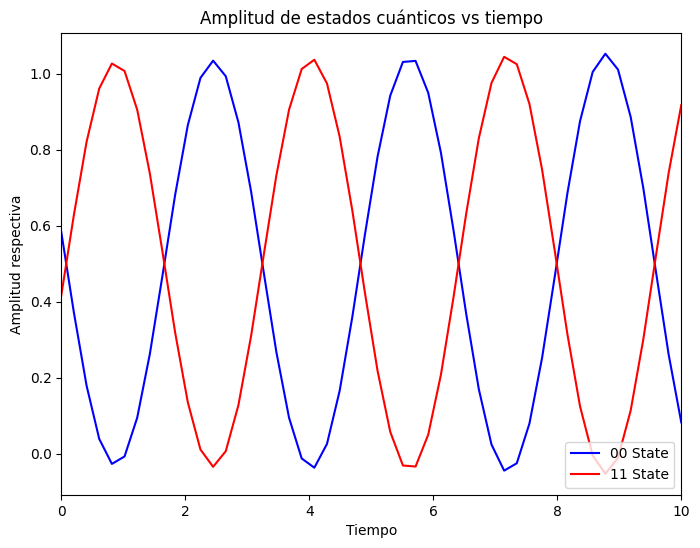

In [25]:
import matplotlib.pyplot as plt

# Código aquí ->
# Juegue con el valor de h para probar que utilizando valores grandes de h la dinámica se vuelve inestable

#plt.plot(times,stateQuant11)
#plt.grid()

plt.figure(figsize=(8, 6))  # Tamaño opcional de la figura
plt.plot(times, stateQuant00, label="00 State", color="blue", linestyle="-")  # Graficar st1 contra time
plt.plot(times, stateQuant11, label="11 State", color="red", linestyle="-")  # Graficar st2 contra time

# Personalización del gráfico
plt.title("Amplitud de estados cuánticos vs tiempo")
plt.xlabel("Tiempo")
plt.ylabel("Amplitud respectiva")
plt.xlim((0,10))
plt.legend(loc = 'lower right')  # Muestra la leyenda
plt.show()
